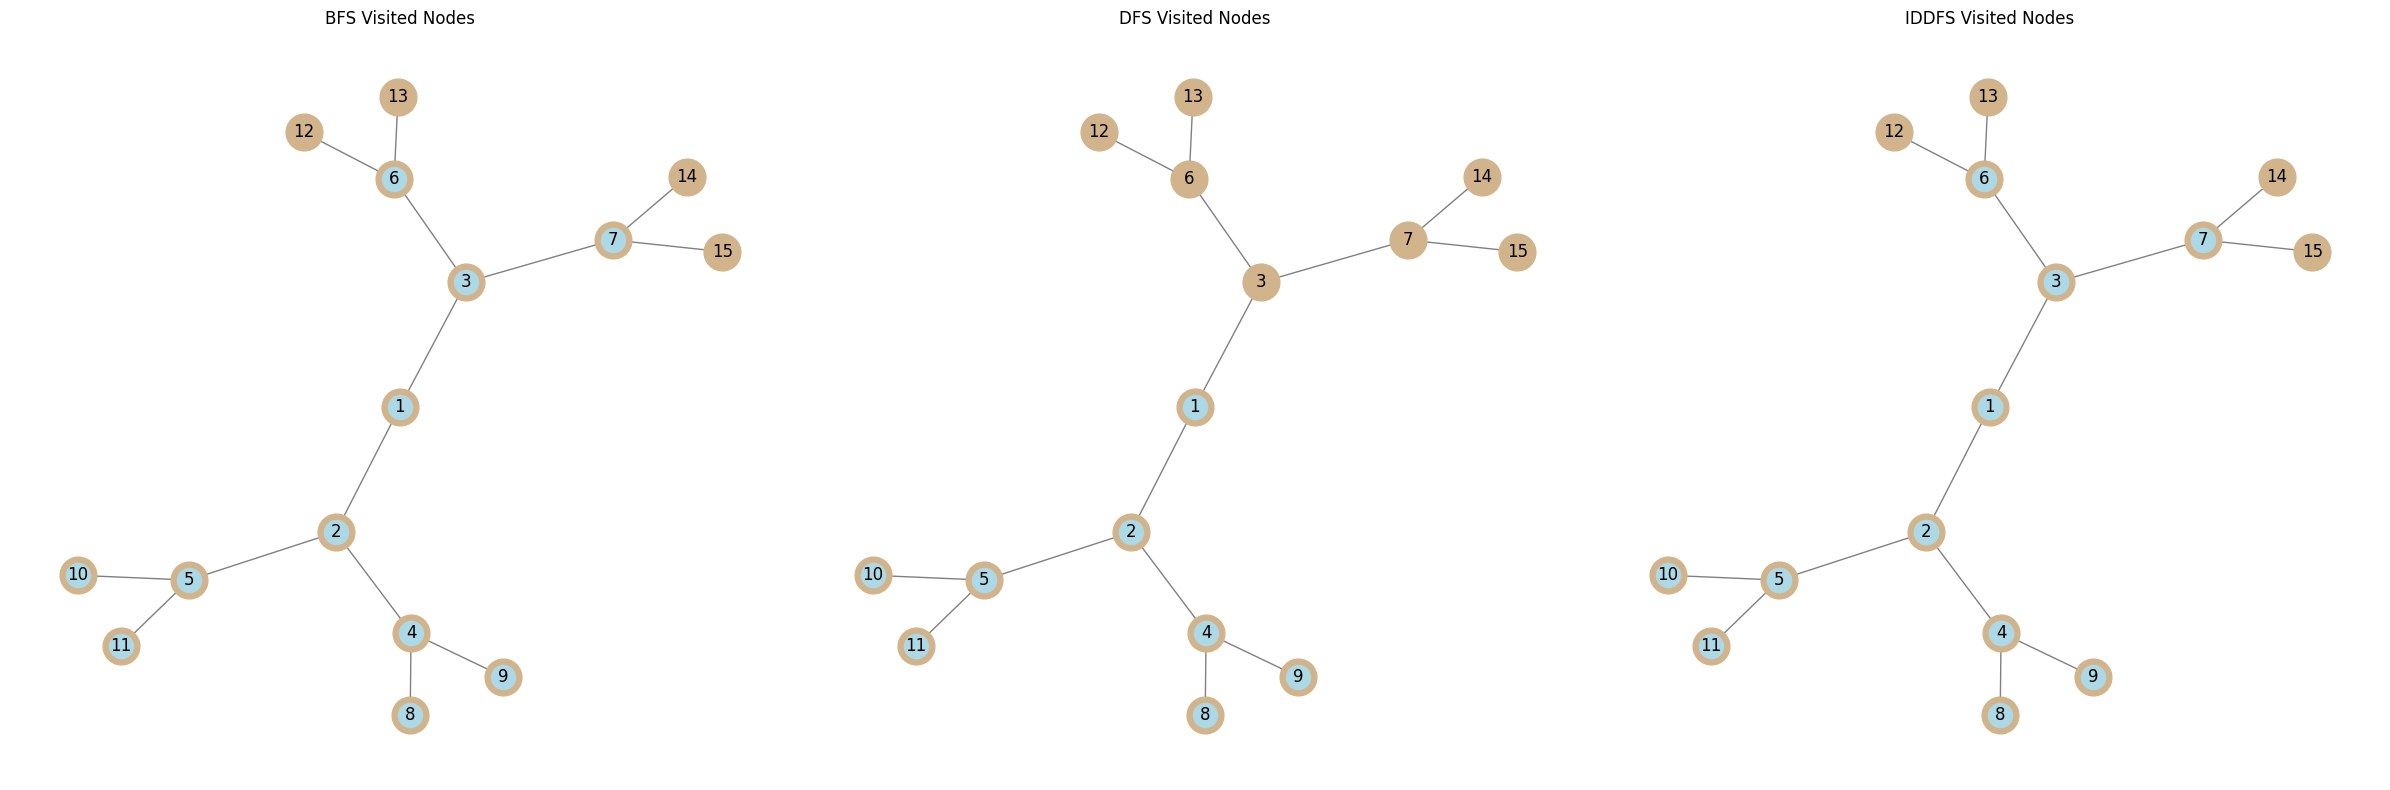

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [1, 2, 4, 8, 9, 5, 10, 11],
 ([1, 1, 2, 3, 1, 2, 4, 5, 3, 6, 7, 1, 2, 4, 8, 9, 5, 10, 11], [1, 2, 5, 11]))

In [52]:
from collections import deque
from typing import Dict, List, Tuple
import matplotlib.pyplot as plt
import networkx as nx


# Define the graph as a dictionary of integer nodes pointing to lists of integer nodes
graph: Dict[int, List[int]] = {
    1: [2, 3],
    2: [4, 5],
    3: [6, 7],
    4: [8, 9],
    5: [10, 11],  # Goal
    6: [12, 13],
    7: [14, 15],

    # leaf nodes
    8: [],
    9: [],
    10: [],
    11: [],  # Goal
    12: [],
    13: [],
    14: [],
    15: []
}

def bfs(graph: Dict[int, List[int]], start: int, goal: int) -> List[int]:
    visited: List[int] = []
    queue: deque = deque([start])

    while queue:
        node: int = queue.popleft()
        if node == goal:
            visited.append(node)
            return visited
        if node not in visited:
            visited.append(node)
            queue.extend([n for n in graph[node] if n not in visited])

    return visited

def dfs(graph: Dict[int, List[int]], start: int, goal: int) -> List[int]:
    visited: List[int] = []
    stack: List[int] = [start]

    while stack:
        node: int = stack.pop()
        if node not in visited:
            visited.append(node)
            if node == goal:
                break
            stack.extend(reversed(graph[node]))

    return visited

def iddfs(graph: Dict[int, List[int]], start: int, goal: int) -> Tuple[List[int], List[int]]:
    visited_order: List[int] = []
    path_to_goal: List[int] = []

    def dls(node: int, depth: int, path: List[int]) -> bool:
        if node not in path:
            visited_order.append(node)

        if node == goal:
            path_to_goal.extend(path + [node])
            return True
        
        if depth == 0:
            return False
        
        for neighbour in graph[node]:
            if dls(neighbour, depth - 1, path + [node]):
                return True
            
        return False

    depth = 0
    while not dls(start, depth, []):
        depth += 1
        if depth > len(graph):
            break

    return visited_order, path_to_goal


def plot_search_algorithms(graph: Dict[int, List[int]], bfs_order: List[int], dfs_order: List[int], iddfs_order: List[int]):
    G = nx.Graph()

    # Add nodes and edges
    for node, edges in graph.items():
        G.add_node(node)
        for edge in edges:
            G.add_edge(node, edge)

    pos = nx.spring_layout(G, seed=24)

    _, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

    nx.draw(G, pos, ax=axes[0], with_labels=True, node_size=700, node_color='tan', edge_color='grey')
    nx.draw_networkx_nodes(G, pos, nodelist=bfs_order, node_color='lightblue', ax=axes[0])
    axes[0].set_title('BFS Visited Nodes')

    nx.draw(G, pos, ax=axes[1], with_labels=True, node_size=700, node_color='tan', edge_color='grey')
    nx.draw_networkx_nodes(G, pos, nodelist=dfs_order, node_color='lightblue', ax=axes[1])
    axes[1].set_title('DFS Visited Nodes')

    nx.draw(G, pos, ax=axes[2], with_labels=True, node_size=700, node_color='tan', edge_color='grey')
    nx.draw_networkx_nodes(G, pos, nodelist=iddfs_order[0], node_color='lightblue', ax=axes[2])
    axes[2].set_title('IDDFS Visited Nodes')

    plt.tight_layout()
    plt.show()

bfs_order: List[int] = bfs(graph, 1, 11)
dfs_order: List[int] = dfs(graph, 1, 11)
iddfs_order: Tuple[List[int], List[int]] = iddfs(graph, 1, 11)

plot_search_algorithms(graph, bfs_order, dfs_order, iddfs_order)

bfs_order, dfs_order, iddfs_order
